<div class="alert alert-block alert-info">
<font color='blue'>
    
## <center>Team : Hi5! <center>


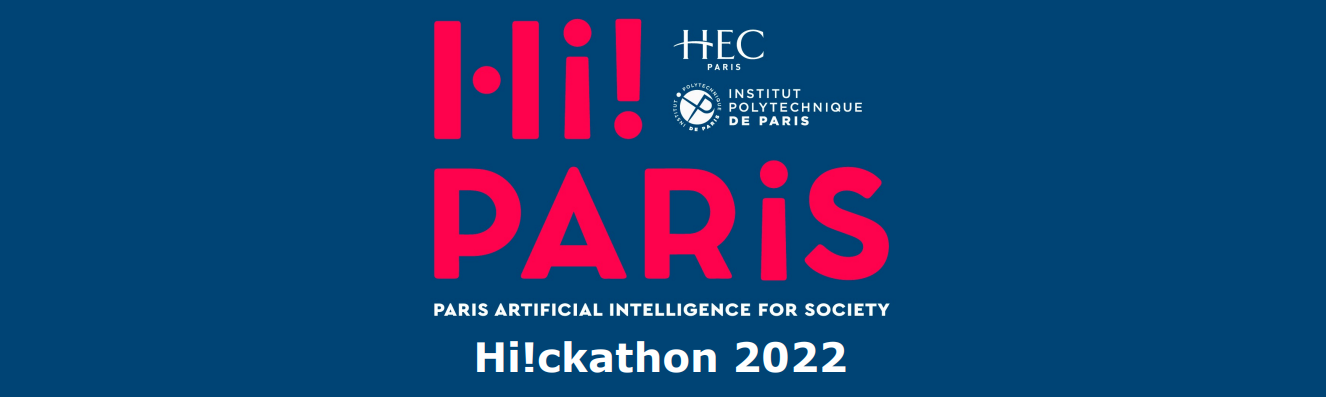

#### <center> 04/03/2022-06/03/2022

# I.	OVERVIEW
## 1.	Project Background and Description
 	Describe how this project came about, and the purpose.
### Subject    
The context:
- According from the INSEE study: "The car remains the main way of commuting, even for short distances."
    
Objective : 
- Reducing the carbon footprint of cars is a complex project that requires the converging forces of companies, employees, and public authorities at the local and national level.

### Purposes
Business perspective:
- Support for the study of public transport lines by involving the various public actors (local authorities, public transport companies, etc.), private (corporate transport), or the prioritization of the creation of bicycle infrastructure / priority areas / the allocation of assistance plans for the purchase of bicycles, etc.

Pedagogical point of view:
- State-of-the-art: Computer Vision & Feature Engineering, 
- Best practice: PEP8 code, reducing the carbon footprint of an AI model,
- AI project management: developing code in community, cutting and modularity, raising awareness on industrialization Business: technology at the service of business, the art of pitching ideas on deploying the algorithmic solution.



## 2.	Project Scope
 	 Scope answers questions including what will be done, what won’t be done, and what the result will look like.

What will be done: 

- Recognize whether the picture represent a car or not,
- Implement algorithm that retrieve the bounding box,
- Make a classification where the outputs are the different existing model,
- Link the class with the footprint impact of each car in order to fullfil the expected deliverable,
- Gives a data model and a csv file where the im_name, the coordonate of the box, and the footprint carbon for each test pictures corresponding to a car.

What won't be done:

- Implement from scratch algorithm and Neural Network,
- Real deployment.

The result: 

- A csv file where for each test picture corresponding to car model, we produce a row for:
        - im_name, the 4 coordonate of the box, the footprint carbon.

## 3.	Presentation of the group
 	Include your specialization at school, etc.
Classification model

| First name | Last name | Year of studies & Profile | School | Skills | Roles/Tasks | 
| ---------- | --------- | ------------------------- | ------ | ------ | ----------- | 
| Margaux    | Boscary   | Final Year                | Polytechnique / ECE | Technical and Business logic| Classification model & Video & scientific procedure     | 
| Emma       | Milliot   | Final Year                | Polytechnique / Mines Albi| Technical and Business logic | Classification model   and scientific procedure  & Video | 
| Paul       | Fayard    | Final Year                | Polytechnique / Télécom Paris| Technical and Business logic | Bounding Box model   & scientific procedure & script video | 
| Imad       | Ez zejjari| Final Year                | Ensimag Grenoble INP | Technical and Business logic |   Bounding Box model   & scientific procedure & script video | 
| Tom        | Reppelin  | Final Year                | Polytechnique / Télécom Paris| Technical and Business logic | Coordinator & implementation code  & scientific procedure    | A
| Imad Eddine| Marouf    | Final Year                | Télécom Paris | Technical and Business logic | Implementation Code    |     
    
First, we all participated in the development of our model and then we splitted the team for the different need of the project.

## 4.	Task Management
 	Describe how you interacted and collaborated as a team, and the effect of every member’s unique background on the project.

The tools used for the project were: 

**H Factory :**
- Topic and dataset, 
- Gitlab,
- Development environments (jupyterLabs, Jupyter notebook, Theia).

**Zoom:**
- Meeting for remotely users.

**Discord:**
- Hi5 network : For the team,
- Hi! PARIS H!ckathon 2022 : for interection between experts and students.

Coming all from engineering school, the background are pretty much the same for all of us.

# II.	PROJECT MANAGEMENT
## 1.	Data Understanding
 	Provided the initial collection of data has already occurred, this step includes identifying and defining the relevant data, exploring the range, scale, formats, contents, and biases of the data, and evaluating the quality and validity of the resulting data.

We got a folder "dataset" provided: 

In this folder we had 3 then 4 (when the test dataset arrived) diles: 

- **datasets_test**
        - Additional_car_models_database
                - 658 additional ".jpg" picture (only cars).
        - test
                - 1025 ".jpg" pictures (not only cars), the size goes from 4.52 kB to 5.91 MB.

- **datasets_train** 
        - Car models_database_train
                - 393 pictures (only cars), 31 different classes.
        - train
                - 2642 pictures (not only cars).
        - train_annotation
                - _annotation.csv file, with im_name, x_min, y_min, x_max, y_max, class, models .
        
- **Welcoming_final_challenge**
        - -> Information for the challenge, like student guide, ...

- **car_models_footprint.csv**
            - 100 rows × 8 columns, with 
                    - models,
                    - Brand,
                    - year,
                    - Average Urban Consumption,
                    - Average extra-urban consumption,
                    - Average mixed consumption,
                    - Average of CO2 (g per km),
                    - Average CO type I.
                
What really matters here is to understand the link between the datasets: 

- We must find the corresponding cars model in the train dataset, with its footprint impact,
- Some cars will have lots of pictures so will be easier identifiable, but we must be careful on the others,
- Some pictures are with better quality than others, some are blurred, other cristal clear.

Thus, after a careful study of all the data, we found that the training images were not sufficient and of poor quality. 
Therefore, we decided to enlarge our data set. We have therefore retrieved the Stanford car dataset. Available at this address: https://ai.stanford.edu/~jkrause/cars/car_dataset.html  .




## 2.	Data Pre-processing
 	Explain how the selection of data was manipulated and modified to remove redundant features and improve the quality of the data. Describe the preprocessing techniques used, such as data augmentation.

Concerning the preprocessing the images were all reduced to the format (244,244) which largely allows to accelerate the calculation. Also we have normalized them according to the 3 color channels. 
Finally, in order to increase our dataset and to improve the learning of the model we have increased the training data. Each image gave rise to 3 other images: an image rotated by 30°, a horizontally inverted image (a mirror effect) and the rotated image inverted as well. 


## 3.	Modeling Development
 	Describe how you selected algorithms, how you calibrated them according to the data and how - in fine - you selected the best AI model using a well-defined set of metrics.

After a brainstorming session, our pipeline regarding a new image is built as follows:
First, we detect cars images and bounding boxes using our first model. Then, we try to recognize the car model and predict the carbon emission using the second model.

The 2 methods are described below:

- For the first task, we choose to work with the Yolo3 model (pretrained model) in order to predict the bounding boxes. Since, the Yolo model is pretrained on different classes, and we predict the boxes. We use this model because it's faster and provide results within few ms. Also, it's not complex to understand and to interpret the different results.

- For the second task, our idea concerning the choice of the multi-classifier was to use a pre-trained model. Indeed, transfer learning is a choice that is both efficient and more respectful of the environment with respect to the necessary computing power. Therefore, we chose the resnet34 network composed of 34 layers of neurons. We fined tuned this model to focus on one output among 196 car models. Our overall accuracy reached 80% on the initial dataset (the one called train).  



## 4.	 Deployment Strategy
 	What best practices/norms did you follow? How do you plan on deploying your IA solution?
    
The deployment strategy of our model for client purpose will be supported with AWS solutions:

- In fact Amazon Web Services (AWS) is focused on efficiency and continuous innovation across their global infrastructure, as they continue on their path to powering their operations with 100% renewable energy by 2025. This will limit the carbon impact for the deployment of our model.

- We know for sure that the Ireland cloud AWS infrastructure are 100% green for instance.

On the cloud, we will have an easy access to the data, and we will be able to stream the data in real time with tools such as Sagemakers. The instance given is scalable if needed. 
Then the Quicksight tools will allow the client to give access to some specific dashboard giving the footprint impact for its need (For instance to calculate the footprint impact an employee).


# III.	CARBON FOOTPRINT LIMITATION
 	Describe the taken measures/actions during the development of your solution in view of limiting the carbon footprint.
Few results concerning time and the frugality of our code: 
- For the bounding box prediction, we need around 0.6 sec for each pictures,
- We took a pre-trained yolo model find on the python library GluonCV because very efficient,
- No need to train our model so we saved footprint impact here,
- Training the classification model took us 32 min.

Thanks to our model, we are able to give the exact carbon impact of each employee. Our goal is not to denounce the big polluters but rather to encourage and motivate each employee to reduce his carbon impact. 
Indeed, each employee will have access to a personalized and continuously updated dashboard in order to report on his impact.
 
For this, we propose to set up a financial reward called 'carbon bonus' for the most environmentally friendly employees. 


# IV.	CONCLUSION
 	Tell us about the actual results, their limitations as well as future perspectives and improvements.
    
Our model is very good at detecting model cars and therefore at estimating carbon emissions. But we are not excellent on the bounding boxes we only reach 75% of IoU, this is due to the speed of the model: we prefer a smaller model less costly and very fast on each image (around a few milliseconds per image).
    

**Results :**


<center>The predicted picture with the bounding box is Audi V8 Sedan 1994, with a footprint impact of : 190 g/km

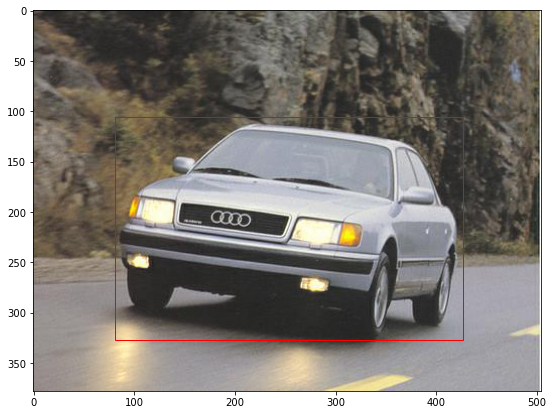

<center>The predicted picture with the bounding box is Volkswagen Beetle Hatchback 2012 : 162.89 g/km of footprint impact
    
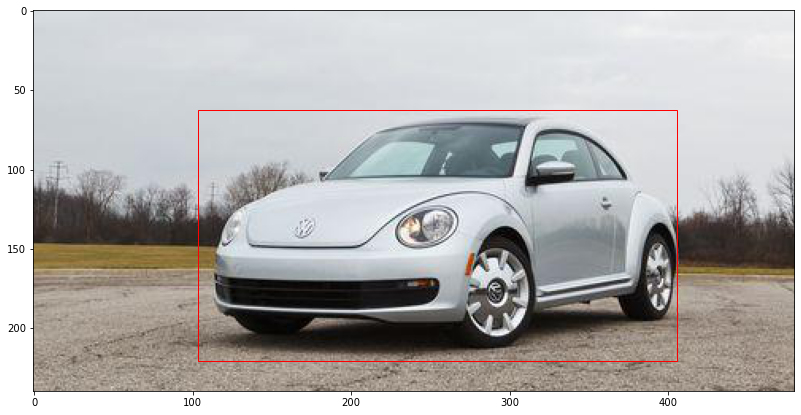

<div class="alert alert-block alert-info">
- As you see, we showed you 2 well visually predicted and boundboxing cars.
We are limited here in a dataset of limited possible models, but we could improve this with adding others classes.
if we had more time, we also would focus on improving our model in order to increase the accuracy.